In [52]:
from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']

In [53]:
url = "https://covid-19.nchc.org.tw/dt_005-covidTable_taiwan.php"

resp = requests.get(url, verify = False)

c:\users\jim87\appdata\local\programs\python\python38\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'covid-19.nchc.org.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [54]:
soup = BeautifulSoup(resp.text, 'html.parser')

In [55]:
print(soup.prettify())

﻿
<!DOCTYPE html>
<html lang="Zh-hant" xml:lang="zh-Hant-TW">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta charset="utf-8"/>
  <meta content="http://covid-19.nchc.org.tw" name="url">
   <meta content="最新台灣疫情關鍵報告 | COVID-19 全球即時疫情地圖 | COVID-19 Global Dashboard by Taiwan | COVID-19疫情儀錶板 | 國家高速網路與計算中心" name="site_name">
    <meta content="最新台灣疫情關鍵報告 | COVID-19 新冠肺炎疫情全球大爆發，每天打開新聞各地確診人數不斷向上攀升，各項數字與新聞報導，到底哪個訊息最新聞快? " name="description"/>
    <meta content="最新台灣疫情關鍵報告 | COVID-19 全球即時疫情地圖 | COVID-19 Global Dashboard by Taiwan | COVID-19疫情儀錶板| 國家高速網路與計算中心" property="og:title"/>
    <meta content="website" property="og:type"/>
    <meta content="https://covid-19.nchc.org.tw/" property="og:url">
     <meta content="https://covid-19.nchc.org.tw/imgs/TWCC_poweredBy_S.png" property="og:image"/>
     <meta content="COVID-19 全球疫情地圖" property="og:site_name">
      <meta content=

In [56]:
for button in soup.find_all("a", {"class": "btn-lg"}):
    print(button)

<a aria-pressed="true" class="btn btn-success btn-lg" href="city_confirmed.php?mycity=新北市" role="button"><span style="font-size: 1em;">新北市 5796<br/><span style="font-size: 0.8em;">+63
 </span></span></a>
<a aria-pressed="true" class="btn btn-success btn-lg" href="city_confirmed.php?mycity=台北市" role="button"><span style="font-size: 1em;">台北市 4003<br/><span style="font-size: 0.8em;">+27
 </span></span></a>
<a aria-pressed="true" class="btn btn-success btn-lg" href="city_confirmed.php?mycity=桃園市" role="button"><span style="font-size: 1em;">桃園市 596<br/><span style="font-size: 0.8em;">+12
 </span></span></a>
<a aria-pressed="true" class="btn btn-success btn-lg" href="city_confirmed.php?mycity=苗栗縣" role="button"><span style="font-size: 1em;">苗栗縣 445<br/><span style="font-size: 0.8em;">+18
 </span></span></a>
<a aria-pressed="true" class="btn btn-success btn-lg" href="city_confirmed.php?mycity=基隆市" role="button"><span style="font-size: 1em;">基隆市 267<br/><span style="font-size: 0.8em;">+4
 </s

In [57]:
button.text.strip()

'金門縣 0'

In [58]:
count_list = {}

a_list = soup.find_all('a', {"class": "btn-lg"})
for a in a_list:
    city_name, city_count = a.findChildren('span')[0].contents[0].strip().split(" ")
    print(f"{city_name} : {city_count}")
    count_list[city_name] = int(city_count)

新北市 : 5796
台北市 : 4003
桃園市 : 596
苗栗縣 : 445
基隆市 : 267
彰化縣 : 254
台中市 : 181
宜蘭縣 : 94
高雄市 : 62
花蓮縣 : 57
新竹縣 : 56
台南市 : 42
新竹市 : 35
屏東縣 : 33
南投縣 : 31
台東縣 : 22
雲林縣 : 20
嘉義縣 : 18
嘉義市 : 9
澎湖縣 : 5
連江縣 : 4
金門縣 : 0


In [59]:
colors = []
for value in count_list.values():
    r = (125 - value * 125 / 6000) / 360
    print(hsv_to_rgb((r, 0.54, 0.96)))
    colors.append(hsv_to_rgb((r, 0.54, 0.96)))
    
colors

[0.96    0.47832 0.4416 ]
[0.96    0.80106 0.4416 ]
[0.50568 0.96    0.4416 ]
[0.4785 0.96   0.4416]
[0.44646 0.96    0.4416 ]
[0.44412 0.96    0.4416 ]
[0.4416  0.96    0.45222]
[0.4416  0.96    0.46788]
[0.4416  0.96    0.47364]
[0.4416  0.96    0.47454]
[0.4416  0.96    0.47472]
[0.4416  0.96    0.47724]
[0.4416 0.96   0.4785]
[0.4416  0.96    0.47886]
[0.4416  0.96    0.47922]
[0.4416  0.96    0.48084]
[0.4416 0.96   0.4812]
[0.4416  0.96    0.48156]
[0.4416  0.96    0.48318]
[0.4416 0.96   0.4839]
[0.4416  0.96    0.48408]
[0.4416 0.96   0.4848]


[array([0.96   , 0.47832, 0.4416 ]),
 array([0.96   , 0.80106, 0.4416 ]),
 array([0.50568, 0.96   , 0.4416 ]),
 array([0.4785, 0.96  , 0.4416]),
 array([0.44646, 0.96   , 0.4416 ]),
 array([0.44412, 0.96   , 0.4416 ]),
 array([0.4416 , 0.96   , 0.45222]),
 array([0.4416 , 0.96   , 0.46788]),
 array([0.4416 , 0.96   , 0.47364]),
 array([0.4416 , 0.96   , 0.47454]),
 array([0.4416 , 0.96   , 0.47472]),
 array([0.4416 , 0.96   , 0.47724]),
 array([0.4416, 0.96  , 0.4785]),
 array([0.4416 , 0.96   , 0.47886]),
 array([0.4416 , 0.96   , 0.47922]),
 array([0.4416 , 0.96   , 0.48084]),
 array([0.4416, 0.96  , 0.4812]),
 array([0.4416 , 0.96   , 0.48156]),
 array([0.4416 , 0.96   , 0.48318]),
 array([0.4416, 0.96  , 0.4839]),
 array([0.4416 , 0.96   , 0.48408]),
 array([0.4416, 0.96  , 0.4848])]

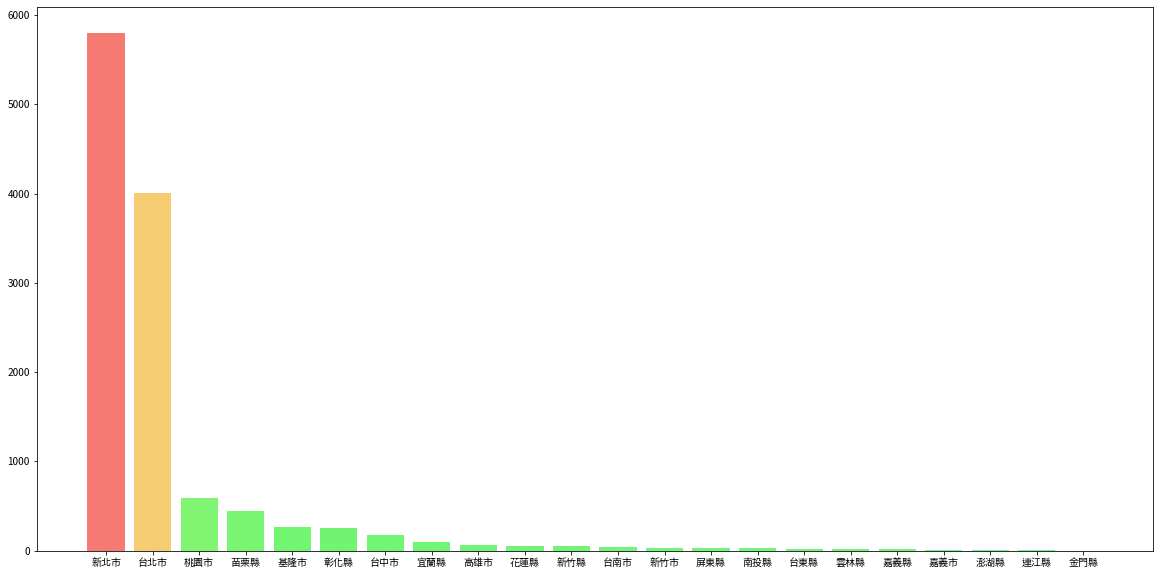

In [60]:
plt.figure(figsize=(20, 10))
plt.bar(count_list.keys(), count_list.values(), bottom = 0, color = colors)
plt.show()